In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
import math
import statistics as stats
import functions

In [55]:
# Rate of change of angle
# Mean angle per frame
# number of pointcloud per frame
# velocity per frame
# average points 
# sum of snr

'''
Loading the file
Change the file name for different experiments
'''
f = sio.loadmat('Alex_3.mat')
fhist = f['fHist']
pc = fhist['pointCloud']
header= fhist['header']
ts = fhist['timestamp']
num_points = fhist['numInputPoints']

In [56]:
dp=[]
snr=[]
r=[]
time=[]
angle=[]
pos=[]
rangeSTD=[]
normalizedRangeSTD=[]
midRangeIntensity=[]
NumberPointcloud=[]
frameTime=[]
SumSNR=[]
SpeedPerFrame=[]
MeanAngle=[]
angleSTD=[]


#fhist.shape[1]
for i in range(fhist.shape[1]):
    #calculate the standard deviations and mean of points range data
    rdata = []
    for k in range(num_points[0,i][0,0]):
        rdata.append(pc[0,i][0,k])
    if len(rdata)!=0:
        sig = np.std(rdata)
        m = np.mean(rdata)
    
    #find range, snr, time, doppler value of data points
    temp=[]
    pointsCollected = False
    for j in range(num_points[0,i][0,0]):
        #clean the data
        if pc[0,i][0,j] > m + 3*sig or pc[0,i][0,j] < m - 3*sig:
            continue

        if pc[0,i][3,j] <= 0:
            snr.append(0.00000000001)
        if pc[0,i][3,j] > 0:
            snr.append(10*np.log10(pc[0,i][3,j]))
   #     t = header[0,i]['timestamp'][0,0][0][0]
        dp.append(pc[0,i][2,j])
        r.append(pc[0,i][0,j])
        angle.append(pc[0,i][1,j])
        time.append(i/20)
   #     s = toEuc(pc[0,i][0,j],pc[0,i][1,j])
        pos.append(functions.toEuc(pc[0,i][0,j],pc[0,i][1,j]))
        temp.append(pc[0,i][0,j])
        medianIndex = np.argsort(temp)[len(temp)//2]
        pointsCollected = True
    if pointsCollected:
        frameTime.append(i/20)
        rangeSTD.append(np.std(temp))
        angleSTD.append(np.std(pc[0,i][1,:]))
        normalizedRangeSTD.append(np.std(temp)*np.sqrt(stats.median(temp)))
        midRangeIntensity.append(10*np.log10(pc[0,i][3,medianIndex]))
        NumberPointcloud.append(num_points[0,i][0,0])
        SumSNR.append(sum(10*np.log10(pc[0,i][3,:])))
        SpeedPerFrame = functions.speedEstimation(pos, time)
        MeanAngle.append(np.mean(pc[0,i][1,:]))

#snr = functions.padded_moving_average(snr,3)
normalizedRangeSTD = functions.padded_moving_average(normalizedRangeSTD, 7)

#print(np.mean(r))

#r,time,snr,dp = functions.filterByIQR(r,time,snr,dp)

0.23959304280155727
0.259024342444337


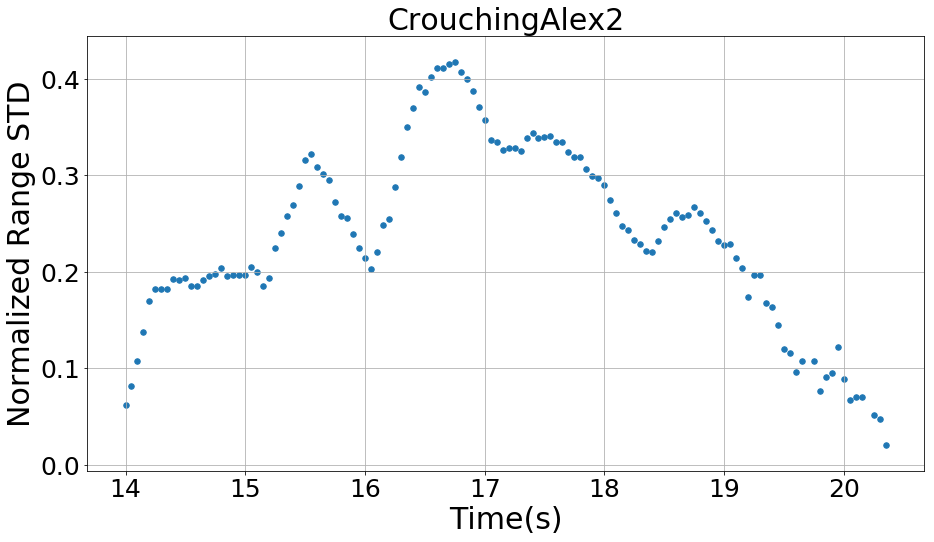

In [58]:
fig1 = plt.figure(figsize = (15,8))
#plt.ylim(-3,3)
p=plt.scatter(frameTime, normalizedRangeSTD,30)
plt.title('CrouchingAlex2', fontsize=30)
#plt.xlim(0,0.25)
#plt.ylim(0,0.45)
plt.xlabel('Time(s)',fontsize=30)
plt.ylabel('Normalized Range STD',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)
print(np.mean(normalizedRangeSTD))
filtered = [i for i in normalizedRangeSTD if i > 0.1]
print(np.mean(filtered))

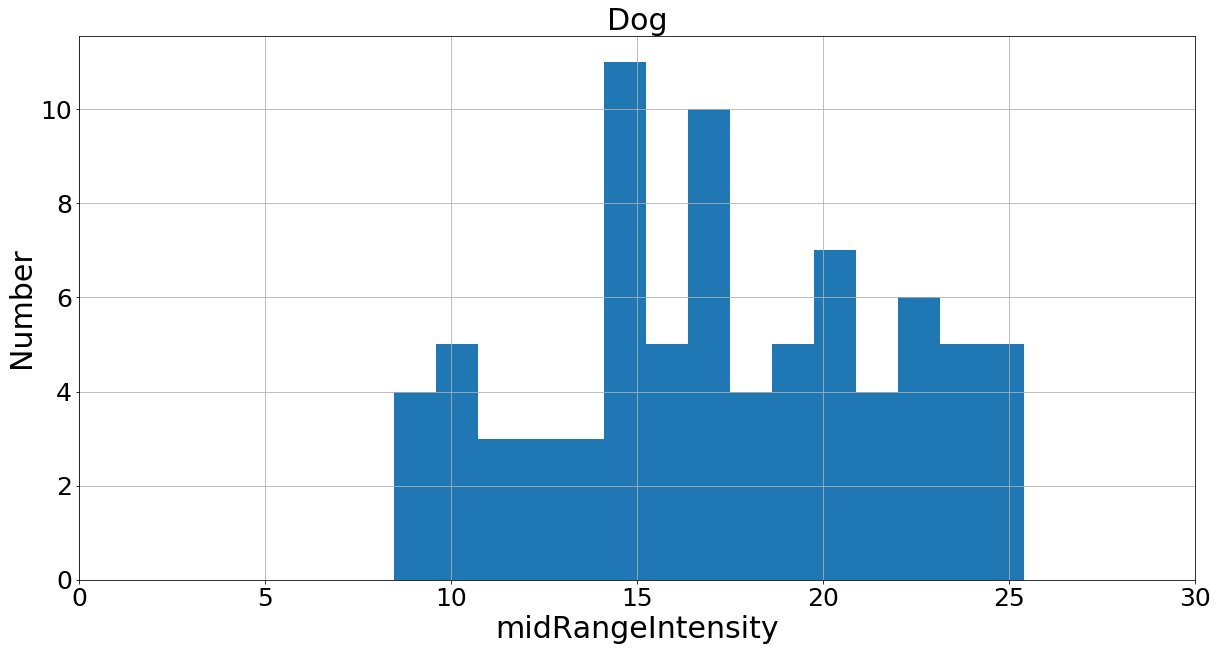

In [85]:
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.hist(midRangeIntensity,15)
plt.title('Dog', fontsize=30)
plt.xlim(0,30)
#plt.ylim(-3,3)
plt.xlabel('midRangeIntensity',fontsize=30)
plt.ylabel('Number',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)

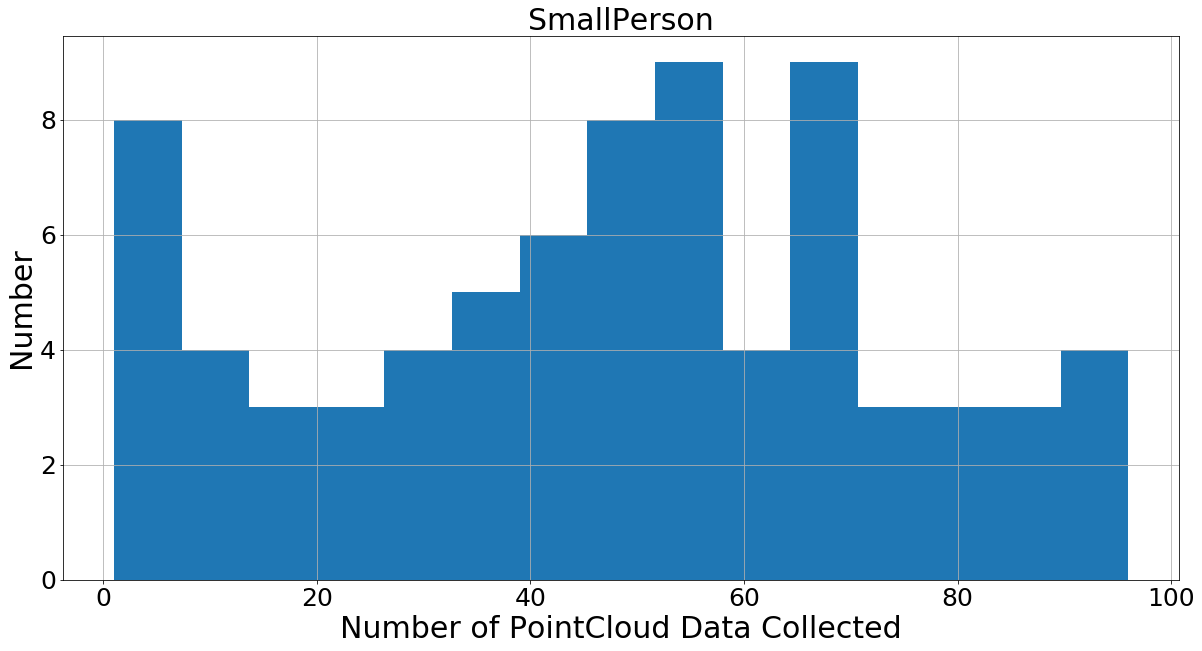

In [17]:
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.hist(NumberPointcould,15)
plt.title('SmallPerson', fontsize=30)
#plt.xlim(5,25)
#plt.ylim(-3,3)
plt.xlabel('Number of PointCloud Data Collected',fontsize=30)
plt.ylabel('Number',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)

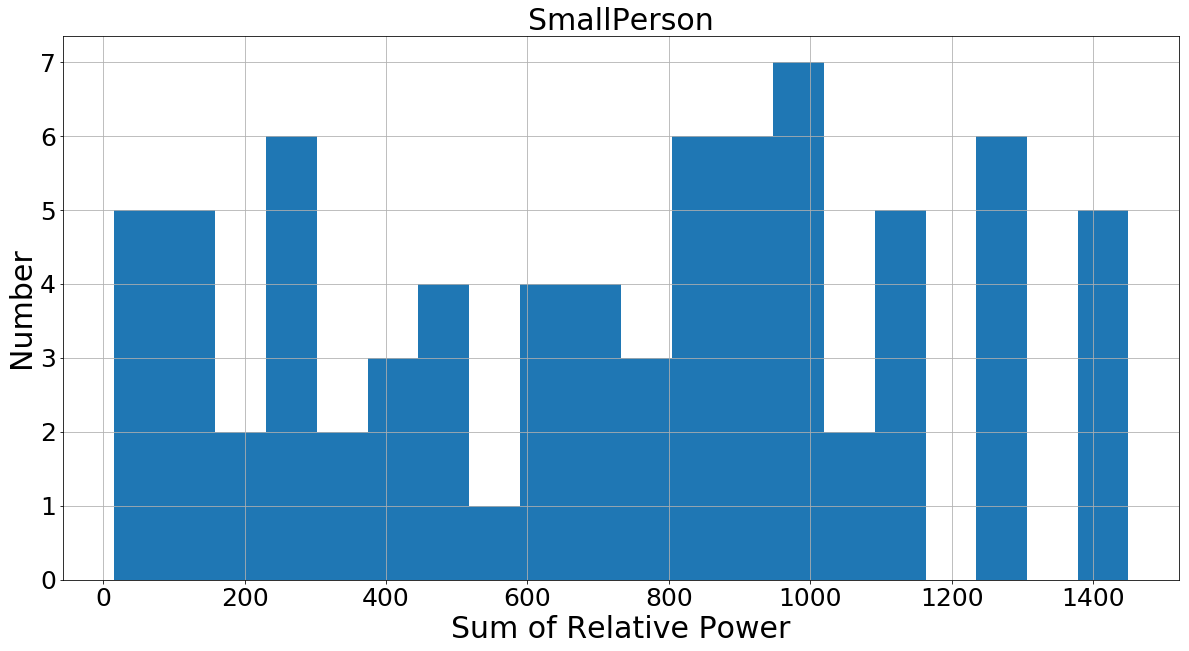

In [18]:
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.hist(SumSNR,20)
plt.title('SmallPerson', fontsize=30)
#plt.xlim(5,25)
#plt.ylim(-3,3)
plt.xlabel('Sum of Relative Power',fontsize=30)
plt.ylabel('Number',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)

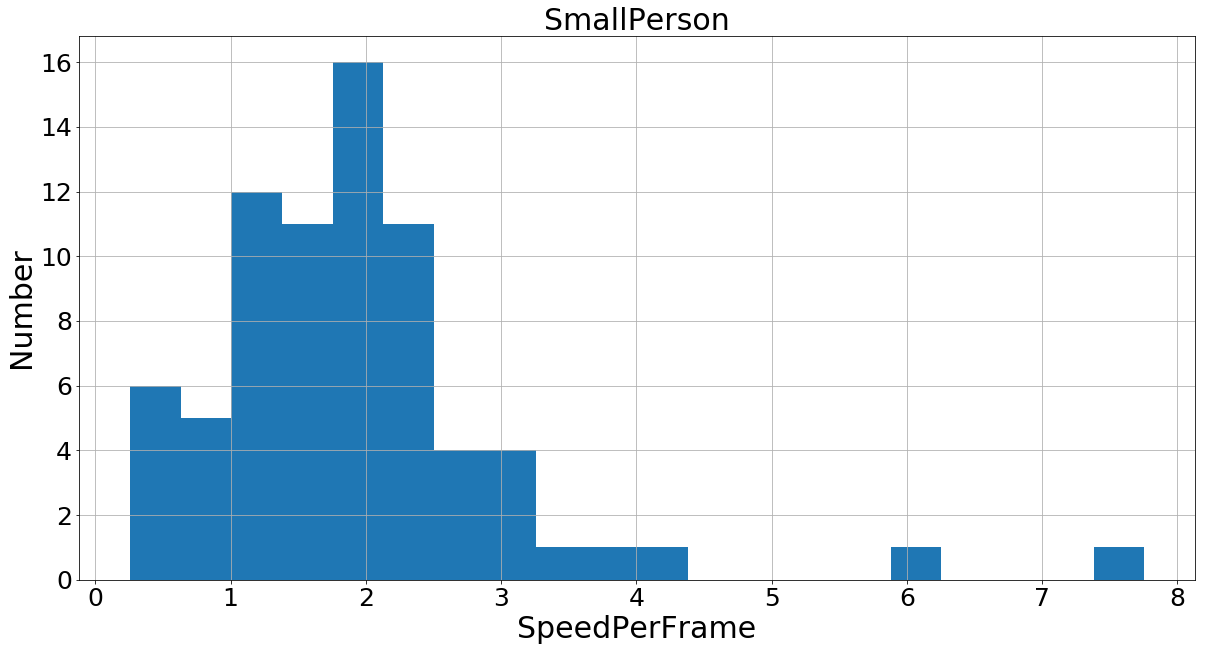

In [19]:
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.hist(SpeedPerFrame,20)
plt.title('SmallPerson', fontsize=30)
#plt.xlim(5,25)
#plt.ylim(-3,3)
plt.xlabel('SpeedPerFrame',fontsize=30)
plt.ylabel('Number',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)

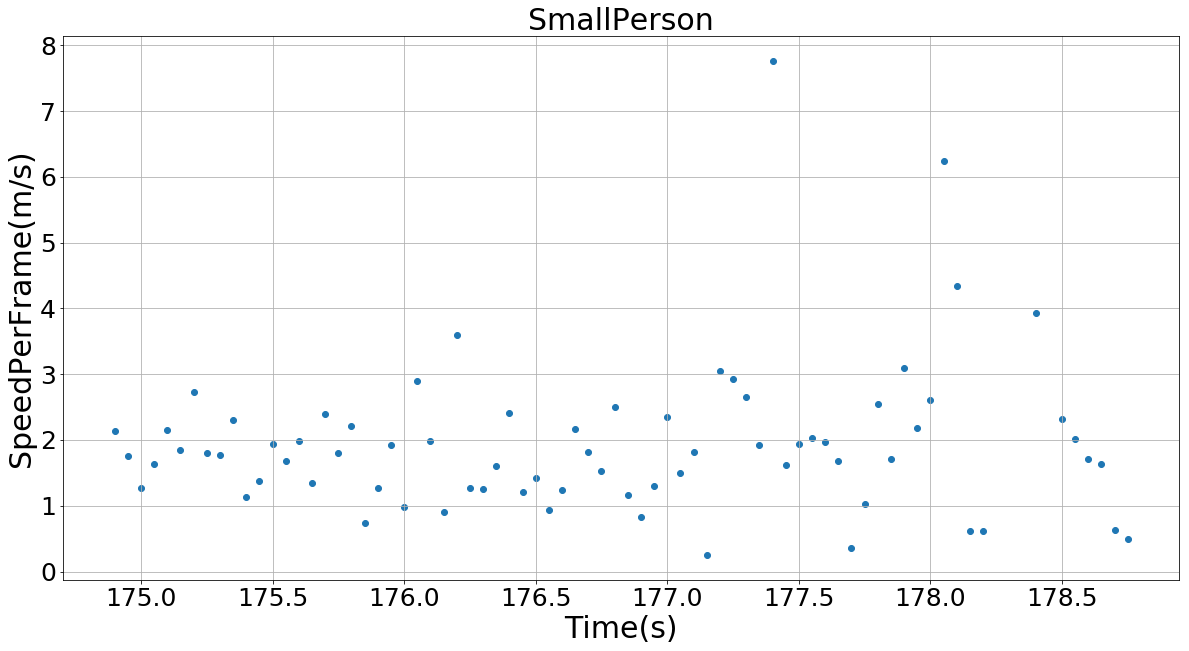

In [20]:
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.scatter(frameTime[1:len(frameTime)-1],SpeedPerFrame)
plt.title('SmallPerson', fontsize=30)
#plt.xlim(5,25)
#plt.ylim(-3,3)
plt.xlabel('Time(s)',fontsize=30)
plt.ylabel('SpeedPerFrame(m/s)',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)

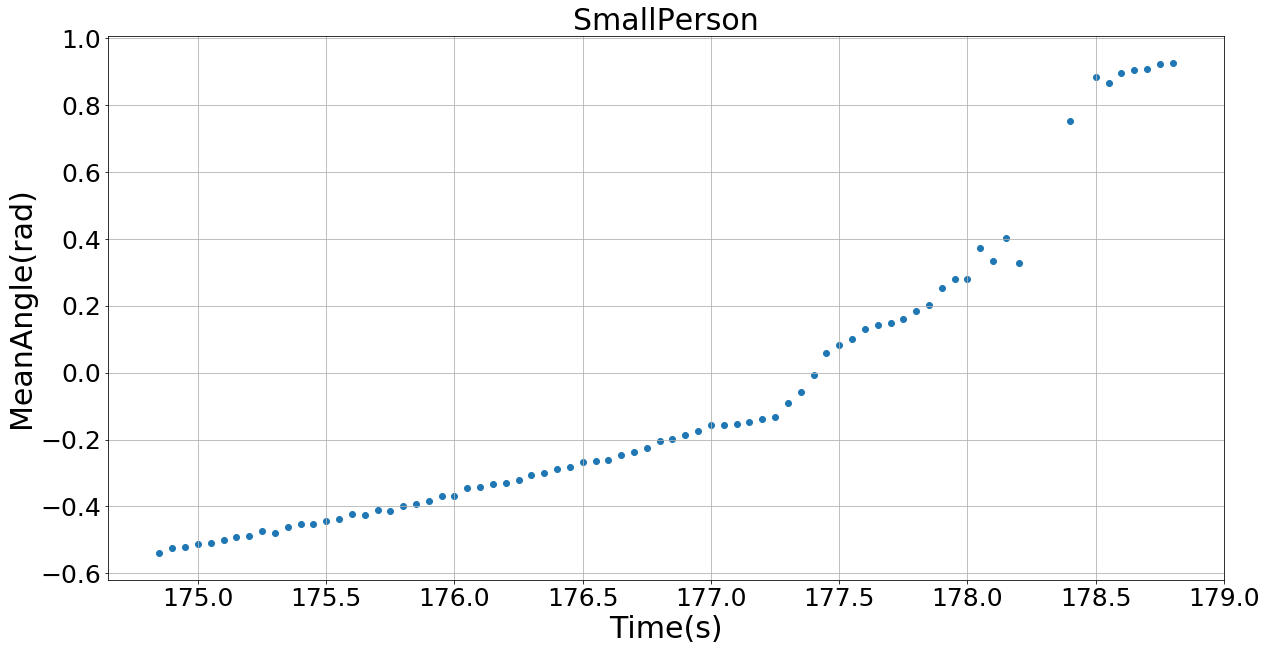

In [21]:
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.scatter(frameTime,MeanAngle)
plt.title('SmallPerson', fontsize=30)
#plt.xlim(5,25)
#plt.ylim(-3,3)
plt.xlabel('Time(s)',fontsize=30)
plt.ylabel('MeanAngle(rad)',fontsize=30)
plt.tick_params(labelsize=25)
plt.grid(True)

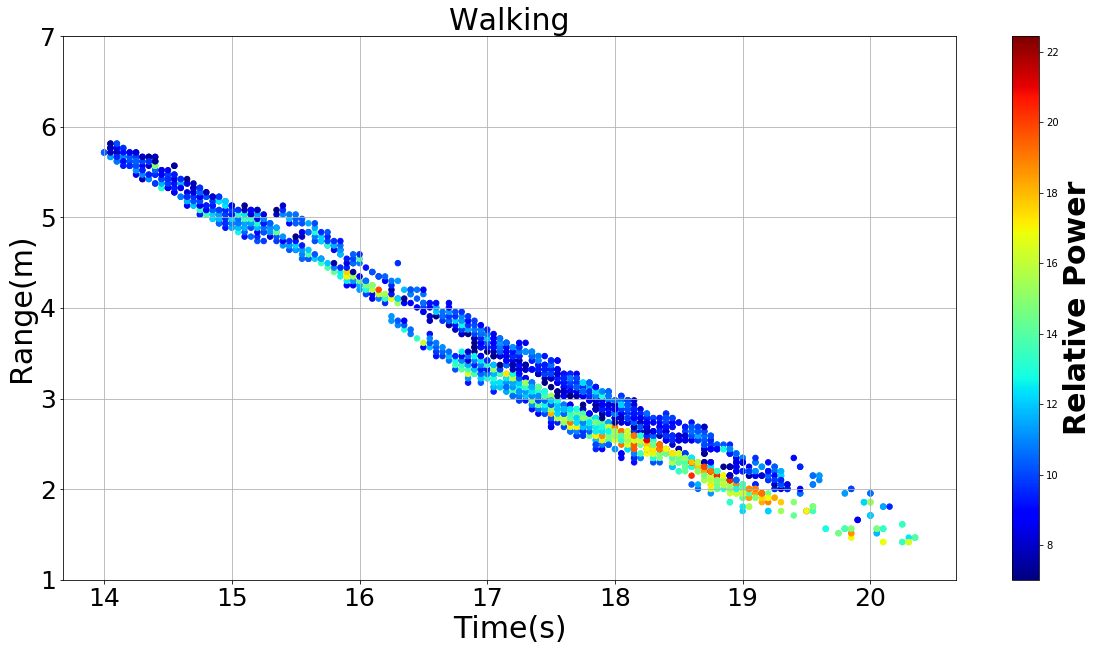

In [59]:
'''
Range vs Time plot
'''
fig1 = plt.figure(figsize = (20,10))
#plt.ylim(-3,3)
p=plt.scatter(time,r, c=snr, cmap='jet', s=30)
plt.title('Walking', fontsize=30)
#plt.xlim(5,25)
plt.ylim(1,7)
plt.xlabel('Time(s)',fontsize=30)
plt.ylabel('Range(m)',fontsize=30)
plt.tick_params(labelsize=25)
cb = plt.colorbar()
cb.set_label(label='Relative Power',weight='bold', fontsize=30)
plt.grid(True)

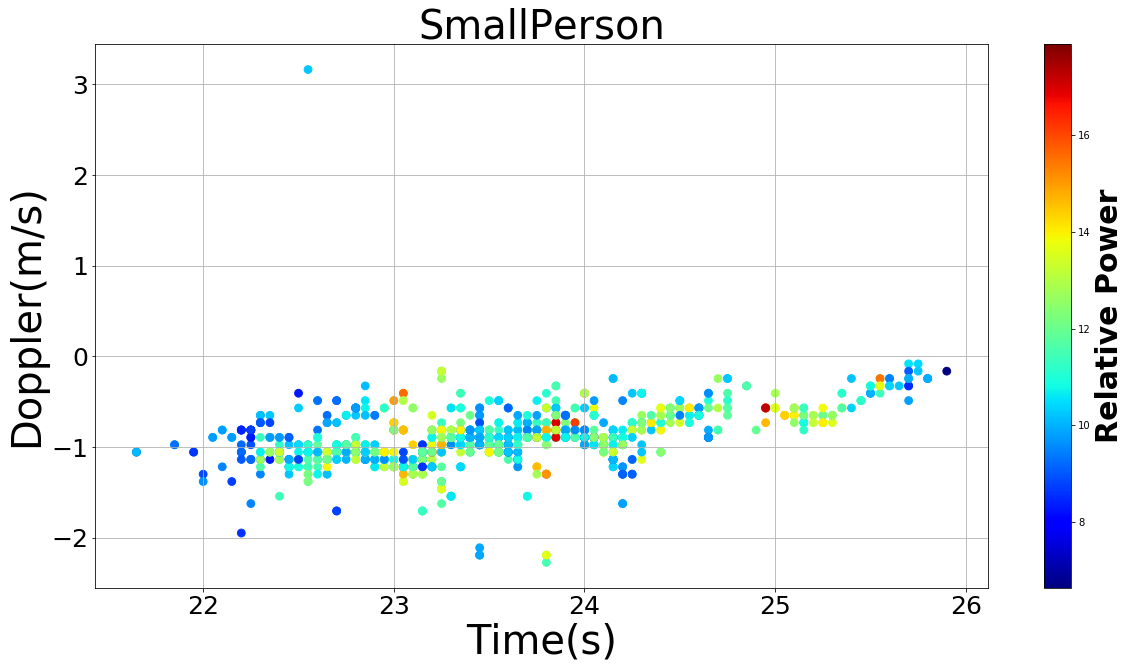

In [403]:
'''
Doppler vs Time plot
'''
fig2 = plt.figure(figsize = (20,10))
p=plt.scatter(time,dp, c=snr, cmap='jet', s=60)
plt.title('SmallPerson', fontsize=40)
plt.xlabel('Time(s)',fontsize=40)
plt.ylabel('Doppler(m/s)',fontsize=40)
plt.tick_params(labelsize=25)
# plt.xlim(15,25)
# plt.ylim(-3,3)
cb = plt.colorbar()
cb.set_label(label='Relative Power',weight='bold', fontsize=30)
plt.grid(True)
#plt.ylim(-3,3)
#p=plt.scatter(time,dp)


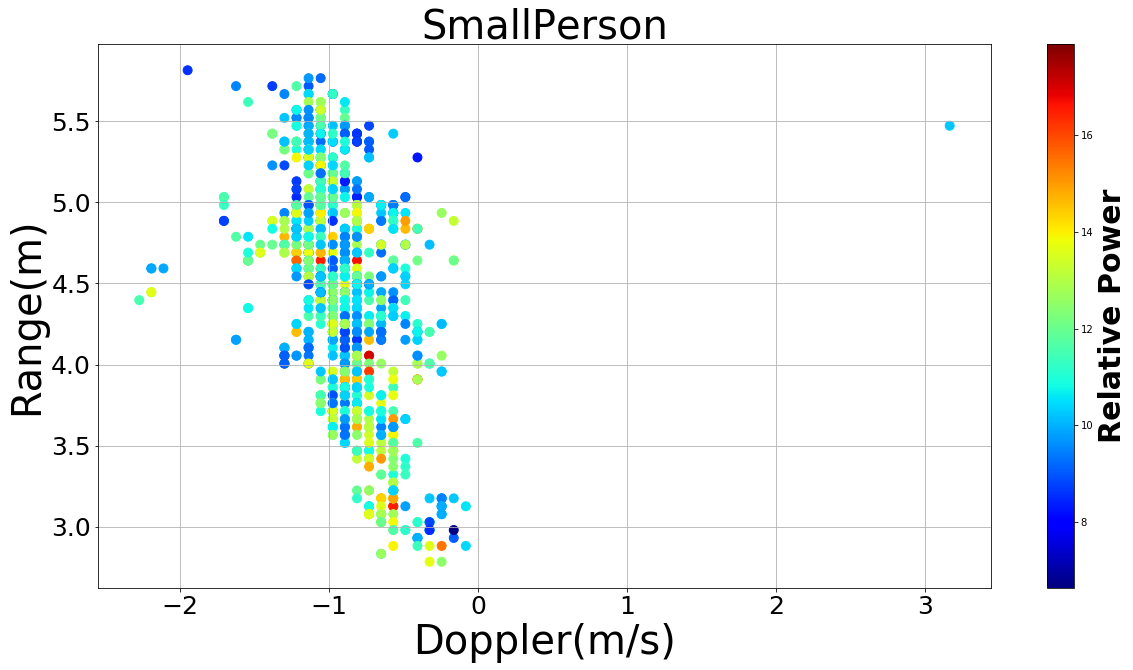

In [404]:
'''
Doppler vs Range plot
'''
fig2 = plt.figure(figsize = (20,10))
p=plt.scatter(dp,r, c=snr, cmap='jet', s=80)
plt.title('SmallPerson', fontsize=40)
plt.xlabel('Doppler(m/s)',fontsize=40)
plt.ylabel('Range(m)',fontsize=40)
plt.tick_params(labelsize=25)
#plt.xlim(15,25)
#plt.ylim(-3,3)
plt.grid(True)
cb = plt.colorbar()
cb.set_label(label='Relative Power',weight='bold', fontsize=30)


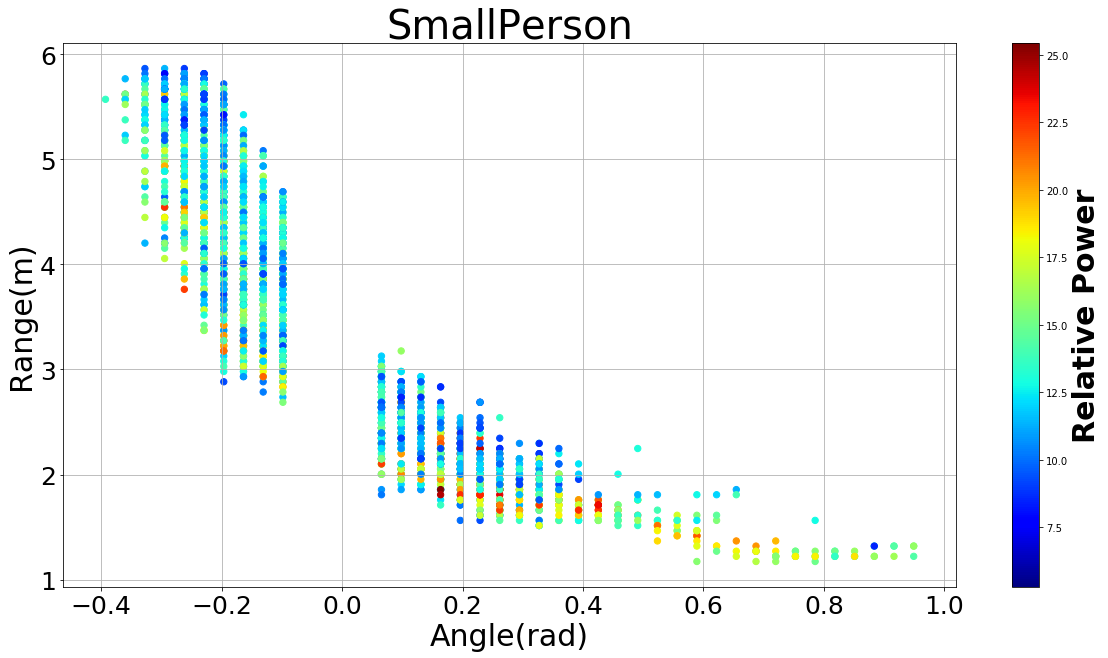

In [63]:
'''
Range vs Angle plot
'''
# print(len(angle[11:-1]), len(r))
fig2 = plt.figure(figsize = (20,10))
p=plt.scatter(angle,r, c=snr, cmap='jet', s=40)
plt.title('SmallPerson', fontsize=40)
plt.xlabel('Angle(rad)',fontsize=30)
plt.ylabel('Range(m)',fontsize=30)
plt.tick_params(labelsize=25)
#plt.xlim(15,25)
#plt.ylim(-3,3)
plt.grid(True)
cb = plt.colorbar()
cb.set_label(label='Relative Power',weight='bold', fontsize=30)


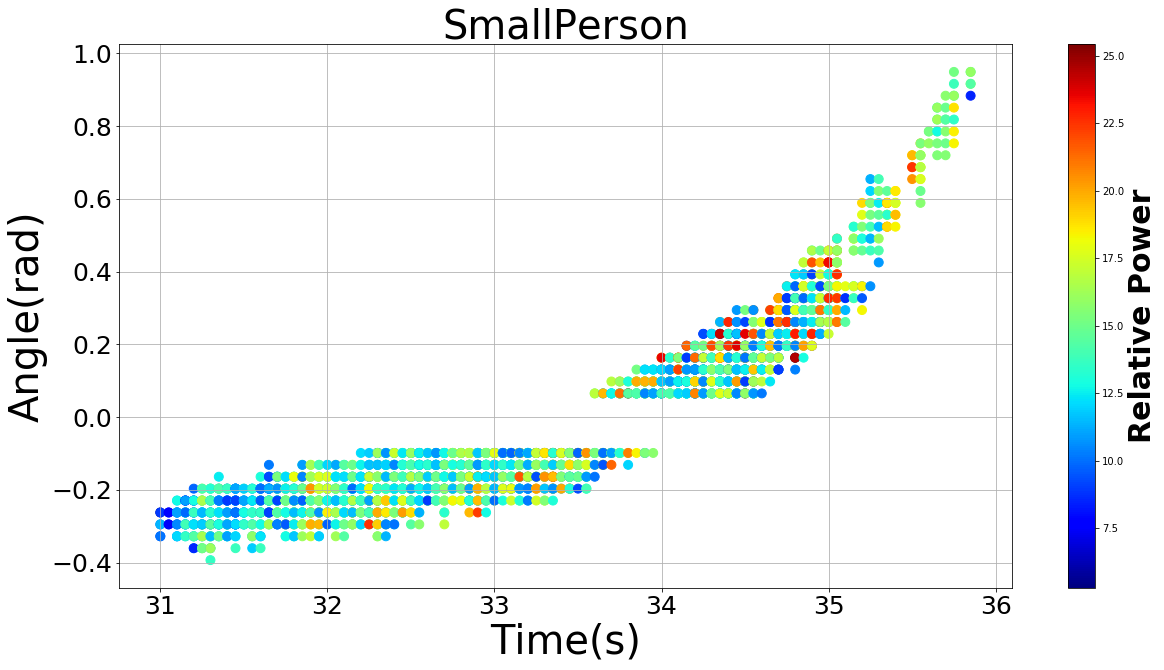

In [65]:
fig2 = plt.figure(figsize = (20,10))
p=plt.scatter(time,angle, c=snr, cmap='jet', s=80)
plt.title('SmallPerson', fontsize=40)
plt.xlabel('Time(s)',fontsize=40)
plt.ylabel('Angle(rad)',fontsize=40)
plt.tick_params(labelsize=25)
#plt.xlim(15,25)
#plt.ylim(-3,3)
plt.grid(True)
cb = plt.colorbar()
cb.set_label(label='Relative Power',weight='bold', fontsize=30)


In [60]:
import csv
with open('CrouchingAlex2.csv', mode='w') as myfile:
    w = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    w.writerow(time)
    w.writerow(dp)
    w.writerow(angle)
    w.writerow(snr)
    w.writerow(frameTime)
    w.writerow(rangeSTD)
    w.writerow(normalizedRangeSTD)
    w.writerow(NumberPointcloud)
    w.writerow(MeanAngle)